In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df3=pd.read_csv('Downloads/MyLA311_Service_Request_Data_2018.csv')
column1=pd.DataFrame(df3['CreatedDate'].astype(str).str.slice(stop=2)).reset_index(drop=True)
column2=pd.DataFrame(df3['RequestSource'].astype(str)).reset_index(drop=True)
df4=pd.DataFrame(column1.join(column2))
df4.columns=['month', 'request source']
df4

/Users/laurakim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,month,request source
0,12,Call
1,03,Driver Self Report
2,12,Call
3,12,Call
4,12,Call
5,12,Mobile App
6,12,Call
7,12,Call
8,12,Call
9,12,Mobile App


In [5]:
df3

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1260439871,12/27/2018 11:49:15 AM,01/02/2019 11:20:35 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(33.9977083391, -118.462727722)",671.0,J,5.0,West Los Angeles APC,11.0,Mike Bonin,68.0,VENICE NC,PACIFIC
1,1-952588571,03/03/2018 11:57:53 AM,03/03/2018 12:00:37 PM,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,NaN,N,...,"(34.1018561204, -118.314165047)",593.0,G,4.0,Central APC,13.0,NaN,30.0,HOLLYWOOD UNITED NC,HOLLYWOOD
2,1-1259414641,12/26/2018 08:15:41 AM,01/02/2019 11:17:00 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.0011004821, -118.302142316)",673.0,J,4.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,81.0,EMPOWERMENT CONGRESS CENTRAL AREA NDC,77TH STREET
3,1-1260251051,12/27/2018 09:15:29 AM,01/02/2019 11:17:14 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2557332674, -118.595028832)",500.0,B,4.0,North Valley APC,12.0,Mitchell Englander,99.0,CHATSWORTH NC,DEVONSHIRE
4,1-1260542861,12/27/2018 01:19:32 PM,01/02/2019 11:17:50 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2802956272, -118.571112353)",500.0,E,1.0,North Valley APC,12.0,Mitchell Englander,114.0,PORTER RANCH NC,DEVONSHIRE
5,1-1260273431,12/27/2018 09:34:21 AM,01/02/2019 11:18:04 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Android,N,...,"(34.1942230736, -118.577746023)",530.0,D,6.0,South Valley APC,3.0,Bob Blumenfield,14.0,WINNETKA NC,TOPANGA
6,1-1262659511,12/31/2018 04:54:37 PM,01/02/2019 11:18:11 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.223403011, -118.609076307)",529.0,J,2.0,North Valley APC,12.0,Mitchell Englander,11.0,WEST HILLS NC,TOPANGA
7,1-1262659351,12/31/2018 04:53:12 PM,01/02/2019 11:18:31 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2296591271, -118.611337792)",529.0,J,1.0,North Valley APC,12.0,Mitchell Englander,11.0,WEST HILLS NC,TOPANGA
8,1-1262097301,12/31/2018 07:58:22 AM,01/02/2019 11:18:38 AM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.2555041366, -118.593193851)",500.0,B,4.0,North Valley APC,12.0,Mitchell Englander,99.0,CHATSWORTH NC,DEVONSHIRE
9,1-1260823410,12/27/2018 06:55:22 PM,01/02/2019 11:18:55 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Android,N,...,"(34.2521143519, -118.593628845)",500.0,B,5.0,North Valley APC,12.0,Mitchell Englander,99.0,CHATSWORTH NC,DEVONSHIRE


In [1]:
import seaborn as sns
sns.set()

In [112]:
def request_source():
    list = []
    for x in df4['request source']:
        if (x == 'Call'):
            list.append('Call')
        elif (x == 'Mobile App'):
            list.append('Mobile App')
        elif (x == 'Twitter'):
            list.append('Twitter')
        else:
            list.append('Others')
    return list

In [113]:
df4['request source']=request_source()

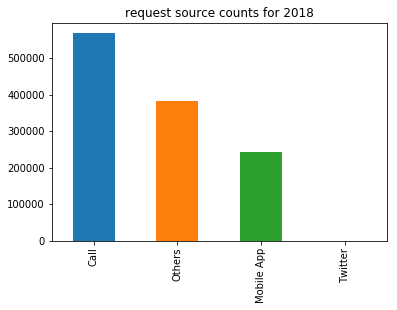

In [114]:
data=df4['request source'].value_counts()
data.plot(kind='bar')
plt.title('request source counts for 2018')
plt.show()

In [125]:
df4[(df4['month']=='12') & (df4['request source']=='Twitter')].count()

month             4
request source    4
dtype: int64

In [115]:
table=pd.DataFrame(df4.groupby(['month'])['request source'].count())
table.columns=['number of request']
table

,number of request
month,
01,101466
02,85267
03,97468
04,99662
05,101669
06,102238
07,111807
08,113799
09,102772


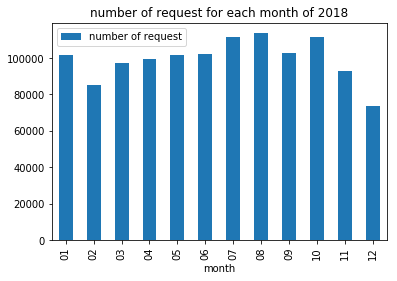

In [116]:
table.plot(kind='bar')
plt.title('number of request for each month of 2018')
plt.show()

In [118]:
table1=pd.DataFrame(df4.groupby(['month'])['request source'].value_counts())
table1.columns=['request source counts']
table1

request source counts
month request source                       
01    Call                            46333
      Others                          35409
      Mobile App                      19724
02    Call                            37919
      Others                          33792
      Mobile App                      13554
      Twitter                             2
03    Call                            41665
      Others                          39064
      Mobile App                      16739
04    Call                            46542
      Others                          33976
      Mobile App                      19142
      Twitter                             2
05    Call                            48582
      Others                          32671
      Mobile App                      20416
06    Call                            51357
      Others                          29335
      Mobile App                      21546
07    Call                            56469
      Others                          32662
      Mobile App                      22675
      Twitter                             1
08    Call                            59157
      Others                          31200
      Mobile App                      23441
      Twitter                             1
09    Call                            50480
      Others                          28957
      Mobile App                      23334
      Twitter                             1
10    Call                            52823
      Others                          34817
      Mobile App                      23667
      Twitter                             3
11    Call                            45086
      Others                          27150
      Mobile App                      20415
      Twitter                             2
12    Call                            31863
      Others                          23165
      Mobile App                      18818
      Twitter                             4

In [142]:
new_table=pd.DataFrame()
month=[1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,11,11,11,11,12,12,12,12]
request_source=['call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter','call','others','mobile app','twitter']
request_source_counts=[46333, 35409,19724,0,37919,33792,13554,2,41665,39064,16739,0,46542,33976,19142,2,48582,32671,20416,0,51357,29335,21546,0,56469,32662,22675,1,59157,31200,23441,1,50480,28957,23334,1,52823,34817,23667,3,45086,27150,20415,2,31863,23165,18818,4]
freq=[46333/101466, 35409/101466,19724/101466,0,37919/85267,33792/85267,13554/85267,2/85267,41665/97468,39064/97468,16739/97468,0,46542/99662,33976/99662,19142/99662,2/99662,48582/101669,32671/101669,20416/101669,0,51357/102238,29335/102238,21546/102238,0,56469/111807,32662/111807,22675/111807,1/111807,59157/113799,31200/113799,23441/113799,1/113799,50480/102772,28957/102772,23334/102772,1/102772,52823/111310,34817/111310,23667/111310,3/111310,45086/92653,27150/92653,20415/92653,2/92653,31863/73850,23165/73850,18818/73850,4/73850]
new_table['month']=month
new_table['request source']=request_source
new_table['request source counts']=request_source_counts
new_table['monthly use frequency']=freq
new_table

,month,request source,request source counts,monthly use frequency
0,1,call,46333,0.456636
1,1,others,35409,0.348974
2,1,mobile app,19724,0.194390
3,1,twitter,0,0.000000
4,2,call,37919,0.444709
5,2,others,33792,0.396308
6,2,mobile app,13554,0.158960
7,2,twitter,2,0.000023
8,3,call,41665,0.427474
9,3,others,39064,0.400788


In [156]:
new_table2=pd.DataFrame()
months=[1,2,3,4,5,6,7,8,9,10,11,12]
call_freq=pd.DataFrame(new_table.loc[new_table['request source']=='call', 'monthly use frequency']).reset_index(drop=True)
app_freq=pd.DataFrame(new_table.loc[new_table['request source']=='mobile app', 'monthly use frequency']).reset_index(drop=True)
twitter_freq=pd.DataFrame(new_table.loc[new_table['request source']=='twitter', 'monthly use frequency']).reset_index(drop=True)
other_freq=pd.DataFrame(new_table.loc[new_table['request source'] == 'others', 'monthly use frequency']).reset_index(drop=True)
new_table2['month']=months
new_table2['call frequency']=call_freq
new_table2['mobile app frequency']=app_freq
new_table2['twitter frequency']=twitter_freq
new_table2['others frequency']=other_freq
new_table2

,month,call frequency,mobile app frequency,twitter frequency,others frequency
0,1,0.456636,0.194390,0.000000,0.348974
1,2,0.444709,0.158960,0.000023,0.396308
2,3,0.427474,0.171738,0.000000,0.400788
3,4,0.466998,0.192069,0.000020,0.340912
4,5,0.477845,0.200809,0.000000,0.321347
5,6,0.502328,0.210744,0.000000,0.286929
6,7,0.505058,0.202805,0.000009,0.292128
7,8,0.519838,0.205986,0.000009,0.274168
8,9,0.491184,0.227046,0.000010,0.281760
9,10,0.474558,0.212622,0.000027,0.312793


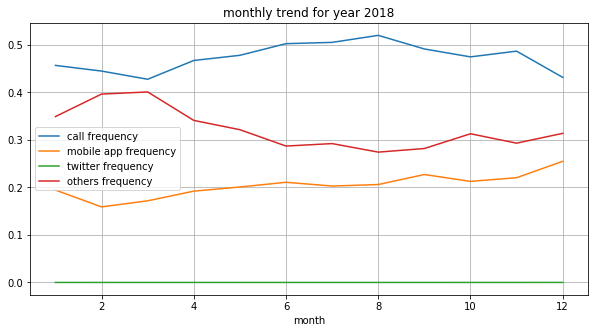

In [157]:
new_table2.plot(x='month', y=['call frequency', 'mobile app frequency', 'twitter frequency', 'others frequency'], figsize=(10,5), grid=True)
plt.title('monthly trend for year 2018')
plt.show()